> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# 03 - Linear regression with real data

## Earth temperature over time

In this lesson, you will analyze real data of Earth temperature over time.

Is global temperature rising? How much? This is a question of burning importance in today's world!

Data about global temperatures are available from several sources: NASA, the National Climatic Data Center (NCDC) and the University of East Anglia in the UK. Check out the [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) for an in-depth discussion.

The [NASA Goddard Space Flight Center](http://svs.gsfc.nasa.gov/goto?3901) is one of our sources of global climate data. They produced the video below showing a color map of the changing global surface **temperature anomalies** from 1880 to 2015.

The term [global temperature anomaly](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

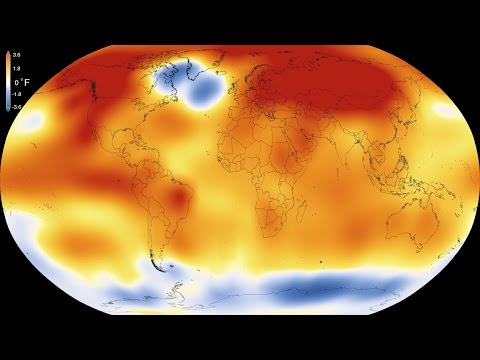

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

How would you go about understanding the _trends_ from the data on global temperature?

The first step in analyzing unknown data is to generate some simple plots using **Matplotlib**. You are going to look at the temperature-anomaly history, contained in a file, and make our first plot to explore this data. 

We are going to smooth the data and then you'll fit a line to it to find a trend, plotting along the way to see how it all looks.

Let's get started!

## Step 1: Read a data file

We took the data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration) webpage. Feel free to play around with the webpage and analyze data on your own, but for now, let's make sure you're working with the same dataset.


We have a file named `land_global_temperature_anomaly-1880-2016.csv` in our `data` folder. This file contains the year on the first column, and averages of land temperature anomaly listed sequentially on the second column, from the year 1880 to 2016. You will load the file, then make an initial plot to see what it looks like.


Start by importing NumPy and pandas

In [2]:
import numpy as np
import pandas as pd

To load our data from the file, you'll use the function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), which lets us immediately save the data into NumPy arrays. (We encourage you to read the documentation for details on how the function works.) Here, you'll save the data into the arrays `year` and `temp_anomaly`.

In [3]:
fname = '../data/land_global_temperature_anomaly-1880-2016.csv'

temp_data = pd.read_csv(fname,skiprows=4)

## Exercise

Inspect the data by printing `temp_data`.

In [4]:
temp_data

,Year,Value
0,1880,-0.47
1,1881,-0.45
2,1882,-0.41
3,1883,-0.60
4,1884,-0.60
...,...,...
132,2012,0.92
133,2013,1.01
134,2014,1.02
135,2015,1.35


## Step 2: Plot the data

Let's first load the **Matplotlib** module called `pyplot`, for making 2D plots. Remember that to get the plots inside the notebook, you use a special "magic" command, `%matplotlib inline`:

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

The `plot()` function of the `pyplot` module makes simple line plots. You avoid that stuff that appeared on top of the figure, that `Out[x]: [< ...>]` ugliness, by adding a semicolon at the end of the plotting command.

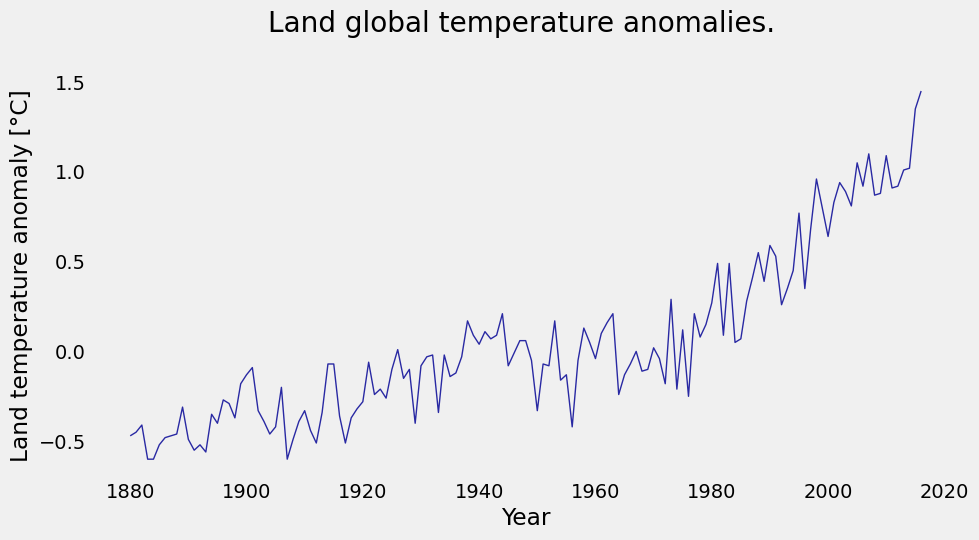

In [6]:
#You can set the size of the figure by doing:
plt.figure(figsize=(10,5))

#Plotting
plt.plot(temp_data['Year'], temp_data['Value'], color='#2929a3', linestyle='-', linewidth=1) 
plt.title('Land global temperature anomalies. \n')
plt.xlabel('Year')
plt.ylabel('Land temperature anomaly [°C]')
plt.grid();

## Step 3: Least-squares linear regression 

In order to have an idea of the general behavior of our data, you can find a smooth curve that (approximately) fits the points. You generally look for a curve that's simple (e.g., a polynomial), and does not reproduce the noise that's always present in experimental data. 

Let $f(x)$ be the function that you'll fit to the $n+1$ data points: $(x_i, y_i)$, $i = 0, 1, ... ,n$:

$$ 
    f(x) = f(x; a_0, a_1, ... , a_m) 
$$

The notation above means that $f$ is a function of $x$, with $m+1$ variable parameters $a_0, a_1, ... , a_m$, where $m < n$. You need to choose the form of $f(x)$ _a priori_, by inspecting the experimental data and knowing something about the phenomenon you've measured. Thus, curve fitting consists of two steps: 

1. Choosing the form of $f(x)$.
2. Computing the parameters that will give us the "best fit" to the data.

### What is the "best" fit?

When the noise in the data is limited to the $y$-coordinate, it's common to use a **least-squares fit** [2], which minimizes the function

$$
\begin{equation}    
    S(a_0, a_1, ... , a_m) = \sum_{i=0}^{n} [y_i - f(x_i)]^2
\end{equation}~~~~~~(1)   
$$

with respect to each $a_j$. You find the values of the parameters for the best fit by solving the following equations:

$$
\begin{equation}
    \frac{\partial{S}}{\partial{a_k}} = 0, \quad k = 0, 1, ... , m.
\end{equation}~~~~~~(2)
$$

Here, the terms $r_i = y_i - f(x_i)$ are called residuals: they tell us the discrepancy between the data and the fitting function at $x_i$. 

Take a look at the function $S$: what you want to minimize is the sum of the squares of the residuals. The equations (2) are generally nonlinear in $a_j$ and might be difficult to solve. Therefore, the fitting function is commonly chosen as a linear combination of specified functions $f_j(x)$, 

$$
\begin{equation*}
    f(x) = a_0f_0(x) + a_1f_1(x) + ... + a_mf_m(x)
\end{equation*}~~~~~~(3)
$$

which results in equations (2) being linear. In the case that the fitting function is polynomial, you have have $f_0(x) = 1, \; f_1(x) = x, \; f_2(x) = x^2$, and so on.

### Linear regression 

When you talk about linear regression you mean "fitting a function to the data." In this case,

$$
\begin{equation}
    f(x) = a_0 + a_1x
\end{equation}~~~~~~(4)
$$

The function that you'll minimize is:

$$
\begin{equation}
    S(a_0, a_1) = \sum_{i=0}^{n} [y_i - f(x_i)]^2 = \sum_{i=0}^{n} (y_i - a_0 - a_1x_i)^2 
\end{equation}~~~~~~(5)    
$$

Equations (2) become:

$$
\begin{equation}
    \frac{\partial{S}}{\partial{a_0}} =  \sum_{i=0}^{n} -2(y_i - a_0 - a_1x_i) = 2 \left[ a_0(n+1) + a_1\sum_{i=0}^{n} x_i - \sum_{i=0}^{n} y_i \right] = 0
\end{equation}~~~~~~(6)    
$$

$$
\begin{equation}
    \frac{\partial{S}}{\partial{a_1}} =  \sum_{i=0}^{n} -2(y_i - a_0 - a_1x_i)x_i = 2 \left[ a_0\sum_{i=0}^{n} x_i + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i \right] = 0
\end{equation}~~~~~~(7)    
$$

Let's divide both equations by $2(n+1)$ and rearrange terms.

Rearranging (6) and (7):

$$
\begin{align}
    2 \left[ a_0(n+1) + a_1\sum_{i=0}^{n} x_i - \sum_{i=0}^{n} y_i \right] &= 0 \nonumber \\ 
    \frac{a_0(n+1)}{n+1} + a_1 \frac{\sum_{i=0}^{n} x_i}{n+1} - \frac{\sum_{i=0}^{n} y_i}{n+1} &= 0 \\
\end{align}~~~~~~(8)
$$

$$
\begin{align}
    a_0  = \bar{y} - a_1\bar{x}
\end{align}~~~~~~(9)
$$

where $\bar{x} = \frac{\sum_{i=0}^{n} x_i}{n+1}$ and $\bar{y} = \frac{\sum_{i=0}^{n} y_i}{n+1}$.

Rearranging (7):

$$
\begin{align}
    2 \left[ a_0\sum_{i=0}^{n} x_i + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i \right] &= 0 \\
    a_0\sum_{i=0}^{n} x_i + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i &=0 \\
\end{align}~~~~~~(10)
$$

Now, if you replace $a_0$ from equation (8) into (9) and rearrange terms:

$$
\begin{align*}
    (\bar{y} - a_1\bar{x})\sum_{i=0}^{n} x_i  + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  &= 0 \\ 
\end{align*}~~~~~~(11)
$$

Replacing the definitions of the mean values into the equation,  

$$
\begin{align*}
    \left[\frac{1}{n+1}\sum_{i=0}^{n} y_i  - \frac{a_1}{n+1}\sum_{i=0}^{n} x_i \right]\sum_{i=0}^{n} x_i  + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  &= 0  \\ 
     \frac{1}{n+1}\sum_{i=0}^{n} y_i \sum_{i=0}^{n} x_i - \frac{a_1}{n+1}\sum_{i=0}^{n} x_i \sum_{i=0}^{n} x_i  + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  &= 0  \\ 
\end{align*}~~~~~~(12)
$$

Leaving everything in terms of $\bar{x}$, 

$$
\begin{align*}
    \sum_{i=0}^{n} y_i \bar{x} - a_1\sum_{i=0}^{n} x_i \bar{x} + a_1\sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_iy_i  = 0  
\end{align*}~~~~~~(13)
$$

Grouping the terms that have $a_1$ on the left-hand side and the rest on the right-hand side:

$$
\begin{align*}
    a_1\left[ \sum_{i=0}^{n} x_{i}^2 - \sum_{i=0}^{n} x_i \bar{x}\right] &= \sum_{i=0}^{n} x_iy_i - \sum_{i=0}^{n} y_i \bar{x} \\
    a_1 \sum_{i=0}^{n} (x_{i}^2 - x_i \bar{x}) &= \sum_{i=0}^{n} (x_iy_i -  y_i \bar{x}) \\
    a_1 \sum_{i=0}^{n} x_{i}(x_{i} -\bar{x}) &= \sum_{i=0}^{n} y_i(x_i - \bar{x})    
\end{align*}~~~~~~(14)
$$

Finally, you get that:

$$
\begin{align}
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})}
\end{align}~~~~~~(15)
$$

Then our coefficients are:

$$
\begin{align}
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})} \quad , \quad a_0  = \bar{y} - a_1\bar{x}
\end{align}~~~~~~(16)
$$

### Let's fit!

Let's now fit a straight line through the temperature-anomaly data, to see the trend over time. We'll use least-squares linear regression to find the slope and intercept of a line 

$y = a_1x+a_0$

that fits our data.

In our case, the `x`-data corresponds to `Year`, and the `y`-data is `Value`. To calculate our coefficients with the formula above, you need the mean values of our data. Since you'll need to compute the mean for both `x` and `y`. 

It is good coding practice to *avoid repeating* ourselves: you want to write code that is reusable, not only because it leads to less typing but also because it reduces errors. If you find yourself doing the same calculation multiple times, it's better to encapsulate it into a *function*. 

Remember the _key concept_ from [02_Working_with_Python](../module_01/02_Working_with_Python): A function is a compact collection of code that executes some action on its arguments.

## Exercise 

Calculate the mean of the `year` and `temp_anomaly` arrays using the NumPy built-in function, `np.mean`.

Assign the means to `mean_x` and `mean_y`.

In [7]:
x = temp_data['Year']
y = temp_data['Value']

mean_x = np.mean(x)
mean_y = np.mean(y)

print('mean_x=',mean_x,'mean_y=',mean_y)

mean_x= 1948.0 mean_y= 0.05262773722627735


Now that you have mean values, you can compute our coefficients by following equations (12). You first calculate $a_1$ and then use that value to calculate $a_0$.

Our coefficients are:

$$
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})} \quad , \quad a_0  = \bar{y} - a_1\bar{x}
$$

We already calculated the mean values of the data arrays, but the formula requires two sums over new derived arrays. Guess what, NumPy has a built-in function for that: [`numpy.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html). Study the code below.

In [8]:
xi = temp_data['Year'].values
yi = temp_data['Value'].values

x_mean = np.mean(xi)
y_mean = np.mean(yi)

a_1 = np.sum(yi*(xi - x_mean)) / np.sum(xi*(xi - x_mean)) 

In [9]:
print(a_1)

0.01037028394347266


In [10]:
a_0 = y_mean - a_1*x_mean

In [11]:
print(a_0)

-20.148685384658464


##### Exercise

Write a function that computes the coefficients, call the function to compute them and compare the result with the values you obtained before. As a hint, you give you the structure that you should follow:

```python
def coefficients(x, y, x_mean, y_mean):
    """
    Write docstrings here
    """

    a_1 = 
    a_0 = 
    
    return a_1, a_0
```

In [12]:
def coefficients(x, y, x_mean, y_mean):
    """
    Write docstrings here
    Arguments
    ---------
    x: independent variable 
    y: dependent variable measurements
    x_mean: mean of independent variable
    y_mean: mean of dependent variable
    Returns
    -------
    a_1: the least-squares regression slope
    a_0: the least-squares regression intercept
    """
    a_1 = np.sum(yi*(xi - x_mean)) / np.sum(xi*(xi - x_mean))
    a_0 = y_mean - a_1*x_mean
    
    return a_1, a_0

In [13]:
coefficients(xi,yi,x_mean,y_mean) # verify result is the same as above

(0.01037028394347266, -20.148685384658464)

We now have the coefficients of a linear function that best fits our data. With them, you can compute the predicted values of temperature anomaly, according to our fit. Check again the equations above: the values you are going to compute are $f(x_i)$. 

Let's call `reg` the array obtined from evaluating $f(x_i)$ for all years.

In [14]:
reg = a_0 + a_1 * xi

With the values of our linear regression, you can plot it on top of the original data to see how they look together. Study the code below.

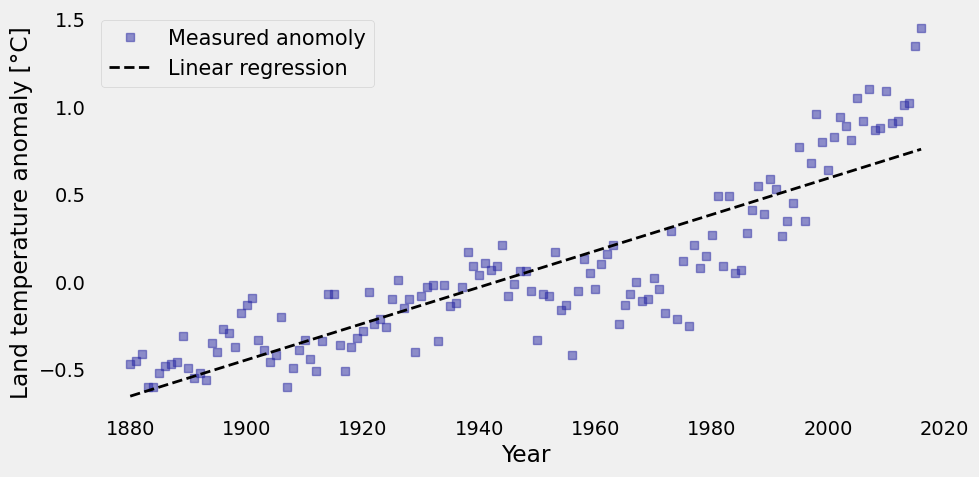

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(xi, yi,'s', color='#2929a3', linewidth=1, alpha=0.5,label='Measured anomoly') 
plt.plot(xi, reg, 'k--', linewidth=2, label='Linear regression')
plt.xlabel('Year')
plt.ylabel('Land temperature anomaly [°C]')
plt.legend(loc='best', fontsize=15)
plt.grid();

## Step 4: Apply regression using NumPy

Above, you coded linear regression from scratch. But, guess what: you didn't have to because NumPy has built-in functions that do what you need!

Yes! Python and NumPy are here to help! With [`polyfit()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html), you get the slope and $y$-intercept of the line that best fits the data. With [`poly1d()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html), you can build the linear function from its slope and $y$-intercept.

Check it out:

In [16]:
# First fit with NumPy, then name the coefficients obtained a_1n, a_0n:
a_1n, a_0n = np.polyfit(xi, yi, 1)

f_linear = np.poly1d((a_1n, a_0n)) 

In [17]:
print(a_1n)

0.01037028394347266


In [18]:
print(a_0n)

-20.14868538465846


In [19]:
print(f_linear)

 
0.01037 x - 20.15


The assignment `f_linear = np.poly1d((a_1n,a_0n))` creates a 1D polynomial. This means that the function only has one independent variable i.e. f(x) = (some value). You can create your own polynomial functions in a similar way using _anonymous functions_ i.e. `lambda`.

```python
f_linear = lambda x: a_1n*x + a_0n
```

In the line of code given above, you create the same assignment for `f_linear(x)`. One benefit of writing this out yourself is that you can see how each input is used directly.

## Exercise

Use the `lambda` function to assign `f_linear` to our 1D polynomial instead of the `np.poly1d` assignment.

In [20]:
f_linear = lambda x: a_1n*x+a_0n

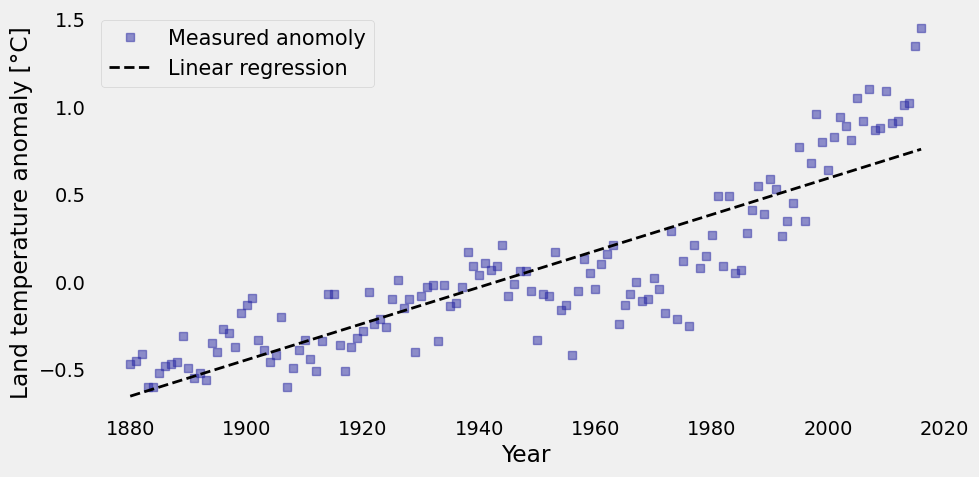

In [21]:
plt.figure(figsize=(10, 5))

plt.plot(xi, yi,'s', color='#2929a3', linewidth=1, alpha=0.5,label='Measured anomoly')
plt.plot(xi, f_linear(xi), 'k--', linewidth=2, label='Linear regression')
plt.xlabel('Year')
plt.ylabel('Land temperature anomaly [°C]')
plt.legend(loc='best', fontsize=15)
plt.grid();

## "Split regression"

If you look at the plot above, you might notice that around 1970 the temperature starts increasing faster that the previous trend. So maybe one single straight line does not give us a good-enough fit.

What if you break the data in two (before and after 1970) and do a linear regression in each segment? 

To do that, you first need to find the position in our `year` array where the year 1970 is located. Thankfully, NumPy has a function called  [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) that can help us. You pass a condition and `numpy.where()` tells us where in the array the condition is `True`.

In [22]:
np.where(xi==1970)

(array([90]),)

To split the data, you use the powerful instrument of _slicing_ with the colon notation. Remember that a colon between two indices indicates a range of values from a `start` to an `end`. The rule is that `[start:end]` includes the element at index `start` but excludes the one at index `end`. For example, to grab the first 3 years in our `year` array, you do:

In [23]:
year = x
temp_anomaly = y
year[0:3]

0    1880
1    1881
2    1882
Name: Year, dtype: int64

Now you know how to split our data in two sets, to get two regression lines. You need two slices of the arrays `year` and `temp_anomaly`, which you'll save in new variable names below. After that, you complete two linear fits using the helpful NumPy functions you learned above.

In [24]:
year_1 , temp_anomaly_1 = year[0:90], temp_anomaly[0:90]
year_2 , temp_anomaly_2 = year[90:], temp_anomaly[90:]

m1, b1 = np.polyfit(year_1, temp_anomaly_1, 1)
m2, b2 = np.polyfit(year_2, temp_anomaly_2, 1)

f_linear_1 = np.poly1d((m1, b1))
f_linear_2 = np.poly1d((m2, b2))

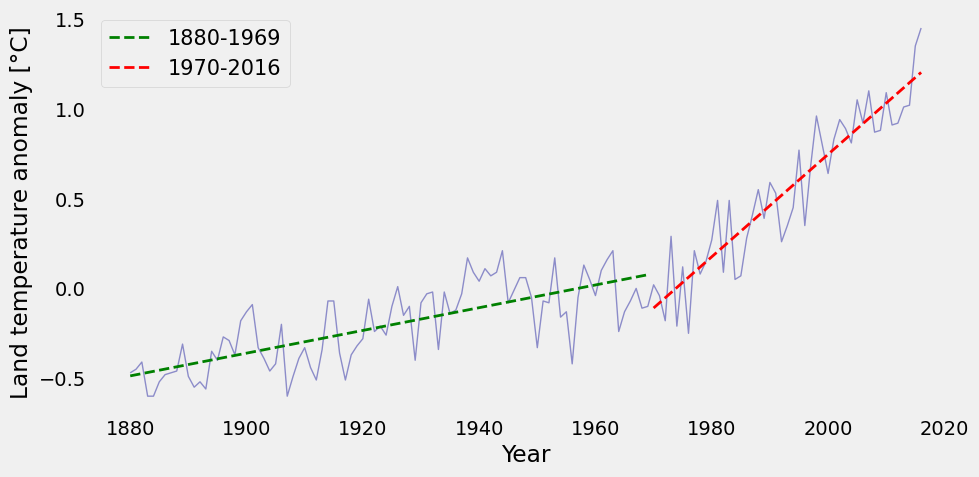

In [25]:
plt.figure(figsize=(10, 5))

plt.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
plt.plot(year_1, f_linear_1(year_1), 'g--', linewidth=2, label='1880-1969')
plt.plot(year_2, f_linear_2(year_2), 'r--', linewidth=2, label='1970-2016')

plt.xlabel('Year')
plt.ylabel('Land temperature anomaly [°C]')
plt.legend(loc='best', fontsize=15)
plt.grid();

## Discussion exercise
We have two different curves for two different parts of our data set. A little problem with this and is that the end point of our first regression doesn't match the starting point of the second regression. You did this for the purpose of learning, but it is not rigorously correct. 

How would you fix this issue? 

What would your new function, $f(x)$, look like?

_To fix this discontinuity, I would do one of two things:_

1. Force the line to remain continuous so the slope changes. This would lead to a piecewise linear fit, with zig-zagging lines

2. Use a higher order polynomial like a quadratic curve, this would like a parabola curving upwards.

## you learned:

* Making our plots more beautiful
* Defining and calling custom Python functions
* Applying linear regression to data
* NumPy built-ins for linear regression
* The Earth is warming up!!!

## References

1. [_Essential skills for reproducible research computing_](https://barbagroup.github.io/essential_skills_RRC/) (2017). Lorena A. Barba,  Natalia C. Clementi, Gilbert Forsyth. 
2. _Numerical Methods in Engineering with Python 3_ (2013). Jaan Kiusalaas. Cambridge University Press.
3. _Effective Computation in Physics: Field Guide to Research with Python_ (2015). Anthony Scopatz & Kathryn D. Huff. O'Reilly Media, Inc.